# Notki od Plociniczaka (komentarz)
Wstęp. Powinien wprowadzać czytelnika w temat projektu oraz zawierać motywacje, cel i znaczenie wykonanej
pracy. Notka historyczna jest również bardzo mile widziana.

• Opis zjawiska/podstawy teoretyczne. W tym dziale znajdować si ˛e powinny wszystkie potrzebne (techniczne)
informacje dotycz ˛ace opisywanego tematu. Zawiera on na przykład definicje, z których później korzystamy lub
opis zjawiska fizycznego, które modelujemy.
1

• Wyniki. Jest to główna cz ˛eść projektu zawieraj ˛aca obliczenia, rachunki numeryczne oraz analiz ˛e danych eksperymentalnych. To, co dokładnie si ˛e tu znajdzie, w bardzo dużym stopniu zależy od tematu projektu i pomysłu
autora. Algorytm numeryczny służ ˛acy do rozwi ˛azywania równania różniczkowego trzeba zaimplementować
samemu.

• Podsumowanie i wnioski. Krótki opis tego, co zostało zrobione i co z tego wynika.

• Literatura. Spis wykorzystanych prac innych autorów. Bibliografia powinna być numerowana z użyciem
kwadratowych nawiasów, np. [1]. Każda pozycja musi mieć odnośnik w głównym tekście pracy. Standard
bibliograficzny odwołań powinien być jednakowy dla wszystkich pozycji. Można odwoływać si ˛e również do
stron internetowych, ale zaznaczmy, że Wikipedia nie jest źródłem naukowym. Stanowi ona jednak bardzo
dobre źródło odnośników do oryginalnych prac. Polecam również korzystanie z Google Scholar do znajdywania
artykułów

<h1 style="color:#daa03d; text-align:center;"> Modelling interspecific interactions

Interspecific interactions is a study of all interactions between species, its causes and consequences. Those interactions can be categorized into five groups:

- competition
- predation
- commensalism
- mutualism 
- parasitism

In our work we will discuss differential models of predation and mutualism.

To solve systems of differential equations we will be using the Runge-Kutta method for the reason being its stability and ...

(probably an overview of Runge-Kutta method)

In [4]:
using Plots
"""
    evaluate(array::Array{Function, 1}, X::Real, Y::Array{Real, 1})::Array{Real, 1}
Return an array with values of function f(t, y₁, y₂) defined in array for given point X
"""
function evaluate(array::Array{Function, 1}, X::Real, Y)::Array{Real, 1}
    return [i(X, Y[1], Y[2]) for i in array]
end
"""
    runge_kutta_for_systems(F::Array{Function, 1}, x::Real, X::Real, Y::Array{Real, 1}, h::Real=1e-3)
Return an array with values of functions which are solutions to the system of differential equations defined by the array.
X and Y are initial conditions, x is the maximum point.
"""
function runge_kutta_for_systems(F::Array{Function, 1}, x::Real, X::Real, Y::Array, h::Real=1e-3)
    n = round(Int64, x / h)
    array = zeros((n, 2))
    for i in 1:n
        k₁ = evaluate(F, X, Y)
        k₂ = evaluate(F, X + 1/2 * h, Y .+ 1/2 * h * k₁)
        k₃ = evaluate(F, X + 1/2 * h, Y .+ 1/2 * h * k₂)
        k₄ = evaluate(F, X + h, Y .+ h * k₃)
        Y = @. Y + h / 6 * (k₁ + 2*k₂ + 2*k₃ + k₄)
        X = X + h
        array[i, :] = Y
    end
    return array
end
nothing

# Predation

Predation is a relation between two species: prey and the predator. They regulate each other's populations. If the number of prey decreases as a result of intensive hunting, the number of predators will also decrease after some time due to lack of food. This in turn will allow a revival of the prey population. The result of these relationships are cyclical changes in the populations. Changes in the predator-prey system are negative feedback loops.

A good example is a fox-rabbit relation

## Lotka-Volterra

Around the year 1920 there were two mathematicians: Lotka and Volterra who independently proposed a differential model that describes the dynamics of a predator-prey relation. This naïve model is mostly discussed as an introduction to relation modelling and because of its historical significance.

This model generally shows the oscillatory tendency of this system, but has any limitations due to its assumptions [1]:

 1. the prey population will grow exponentially when the predator is absent; 
 2. the predator population will starve in the absence of the prey population (as opposed to switching to another type of prey);
 3. predators can consume infinite quantities of prey; 
 4. there is no environmental complexity (in other words, both populations are moving randomly through a homogeneous environment).
 
From that we can formulate the system of differential equations:
 
$$\begin{cases} y_1' = a y_1 - b y_1 y_2\\ y_2' = c y_2 y_1 - d y_2\end{cases}$$
 
where $a, b, c, d$ are positive constants and $y_1, y_2$ are respectively prey population and predator population.

The first equation describes the change in prey population:
- $a y_1$ (breeding);
- $- b y_1 y_2$ (being eaten - more prey = more food for predator, more predator = more prey is eaten).

The second equation describes the change in predator population:
- $c y_2 y_1$ (eating prey);
- $- d y_2$ (competition - more predator = less food for each one).

### Solving

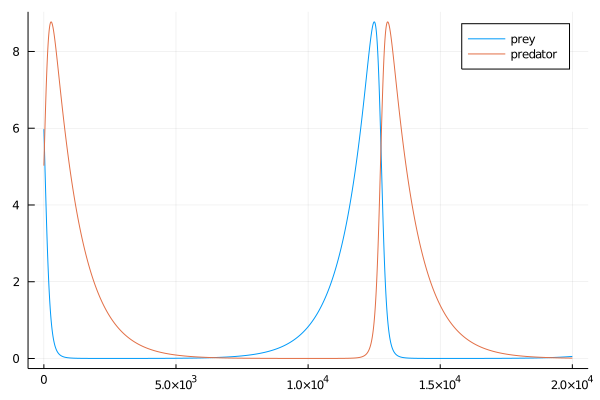

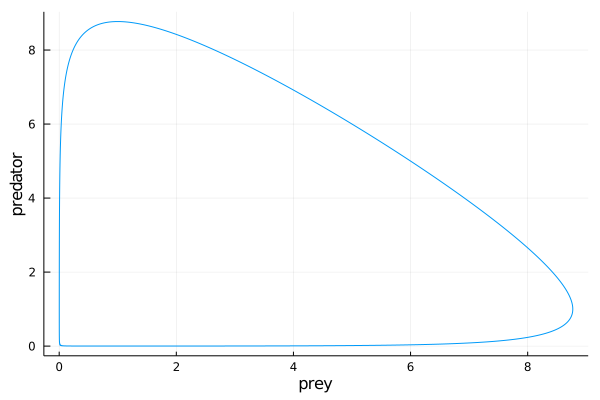

In [83]:
# system of equations (a,b,c,d = 1)
array = [(t, y₁, y₂) -> (y₁ * (1.0 - y₂)),
         (t, y₁, y₂) -> (y₂ * (y₁ - 1.0))]

# initial values other than 0 (this would simplify the model)
Y2 = [6.0, 5.0]

# solution
b = runge_kutta_for_systems(array, 20, 0, Y2)

# plotting
p = plot(b[:, 1], label="prey")
p = plot!(b[:, 2], label="predator")
display(p)
p = plot(b[:, 2], b[:, 1], label=nothing, xlabel="prey", ylabel="predator")
display(p)
nothing

## Realistic Lotka-Volterra
Realistic, better, yea

### Solving

In [62]:
array = [(t, y₁, y₂) -> (y₁ * (1.0 - y₂)),
         (t, y₁, y₂) -> (y₂ * (y₁ - 1.0))]
Y2 = [6.0, 5.0]
b = runge_kutta_for_systems(array, 20, 0, Y2)

p = plot(b[:, 1], label="prey")
p = plot!(b[:, 2], label="predator")
# display(p)
p = plot(b[:, 2], b[:, 1], label=nothing, xlabel="prey", ylabel="predator")
# display(p)
nothing

## Evaluation

For comparison we will plot real world population of foxes and rabbits[2] along with predicted populations both for simple and realistic model (constants where chosen for best fit):

In [80]:
# real-world data
p = plot()
# display(p)

# simple model
p = plot()
# display(p)

# realistic model
p = plot()
# display(p)
nothing

We can clearly see that simple Lotka-Volterra model is far from accurate, but it gives us a good intuition about what is happening between two species that are in this relation.

The realistic model is much better at predicting actual dynamics because its assumptions are much more, of course, realistic.

# Mutualism

Mutualism is a kind of species interactions in which every species has benefits. 

For instance:
- bees and flowers (bees help to pollinate flowers);
- cape buffalos and red-billed oxpecker (the birds clean the skin of a buffalo from any parasites at the same time gathering food and fur for building nests).

## Model

A very naive approach would be a system like this one:

 $$ \begin{cases} y_1^{'} = \alpha_1 y_1 + \beta_1 y_1 y_2 \\ y_{2}^{'} = \alpha_2 y_2 + \beta_2 y_1 y_2\end{cases}$$
 
where constants $\alpha_1$, $\alpha_2$, $\beta_1$, $\beta_2$ are all positive. We can immediately see that this model is completely unreallistic since both species would grow infinitely.

It seems reasonable to add an environmental capacity $K$, and thus we will obtain:

$$\begin{cases} y_{1}^{'} = r_1y_1\left(1 - \frac{N_1}{K_1} + b_{12}\frac{N_2}{K_1}\right) \\ y_2^{'} = r_2y_2\left(1 - \frac{N_2}{K_2}+b_{21}\frac{N_1}{K_2}\right)\end{cases}$$

### Solving

In [85]:
nothing

## Evaluation

Blah

In [88]:
plot()
nothing

blah

# Summary

Biology and maths and statistics blah

# References

[1] [PREDATOR-PREY DYNAMICS: LOTKA-VOLTERRA](http://www.tiem.utk.edu/~gross/bioed/bealsmodules/predator-prey.html)

[2] GUS

[3] Murray "Mathematical Biology"